# Final Exam (part 1) - Computational Physics 2

### Deadline: Friday 6 June 2025 (by 23h59)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.


## 1. Finite-difference method for quantum mechanics: Wave packets in a Parabolic Potential

Consider a quantum mechanical particle of mass $m$ constrained to move along the x-axis. Its dynamics are governed by the **time-dependent Schrödinger equation**:

$$i\hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x) \Psi(x,t)$$

where $\Psi(x,t)$ represents the quantum state of the particle, $\hbar$ is the reduced Planck constant, $m$ is the mass of the particle, and $V(x) = \frac{1}{2} m \omega^2 x^2$ is the one-dimensional quantum harmonic oscillator potential with $\omega$ representing the angular frequency of the oscillator.

### Initial Conditions:

At time $t=0$, you will explore two different initial wavefunctions for the particle:

1.  **Single Gaussian Wave Packet:** A localized wave packet with an initial momentum:

$$\Psi(x,0) = A e^{-\frac{(x-x_0)^2}{2\sigma^2}} e^{i p_0 x / \hbar}$$

where $x_0$ is the initial position, $\sigma$ is the width, and $p_0$ is the initial momentum. $A$ is a normalization constant.

2.  **Superposition of Two Gaussian Wave Packets:** It is formed by the sum of two distinct Gaussian wave packets:

$$\Psi(x,0) = A_1 e^{-\frac{(x-x_{0,1})^2}{2\sigma_1^2}} e^{i p_{0,1} x / \hbar} + A_2 e^{-\frac{(x-x_{0,2})^2}{2\sigma_2^2}} e^{i p_{0,2} x / \hbar}$$

where $x_{0,k}$ are initial positions, $\sigma_k$ are widths, $p_{0,k}$ are initial momenta for each packet, and $A_k$ are constants adjusted such that the total wavefunction $\Psi(x,0)$ is **normalised**, meaning $\int_{-\infty}^{\infty} |\Psi(x,0)|^2 dx = 1$.

### Boundary Conditions:

You will simulate the particle in a finite spatial domain, $[-L_x/2, L_x/2]$. At the boundaries of this domain, we will apply **Dirichlet boundary conditions**, meaning the wavefunction is identically zero: $\Psi(-L_x/2, t) = \Psi(L_x/2, t) = 0$.

### Tasks

Your goal is to develop and implement a numerical algorithm to solve the time-dependent Schrödinger equation using the **Crank-Nicolson method** that we reviewed in class:

#### (a) Mathematical derivation:

In a markdown cell, derive the discrete form of the time-dependent Schrödinger equation using the **Crank-Nicolson method**.

- Begin by discretising the spatial domain ($x_j = j \Delta x$) and time ($t_n = n \Delta t$).

- Use a central finite difference approximation for the second spatial derivative. Your derivation should lead to a matrix equation of the form $\mathbf{A} \Psi^{n+1} = \mathbf{B} \Psi^n$, where $\Psi^{n+1}$ and $\Psi^n$ are vectors of the wavefunction at interior grid points.

- Clearly define the elements of the tridiagonal matrices $\mathbf{A}$ and $\mathbf{B}$ in terms of $\hbar$, $m$, $\Delta x$, $\Delta t$, and $V_j$.

- Show how the discrete Hamiltonian operator $\mathbf{H}$ is represented within these matrices.



## Step 1: The Time-Dependent Schrödinger Equation

We begin with the fundamental time-dependent Schrödinger equation in one dimension:

$$i \hbar \frac{\partial \Psi(x, t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x, t)}{\partial x^2} + V(x) \Psi(x, t)$$


## Step 2: Quantum Harmonic Oscillator

For the specific case of a quantum harmonic oscillator, the potential is:

$$V(x) = \frac{1}{2} m \omega^2 x^2$$

Substituting this into the Schrödinger equation:

$$i \hbar \frac{\partial \psi(x, t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x, t)}{\partial x^2} + \frac{1}{2} m \omega^2 x^2 \psi(x, t)$$

The harmonic oscillator potential creates a parabolic energy well, leading to discrete energy eigenvalues $E_n = \hbar \omega (n + \frac{1}{2})$.

## Step 3: Spatial and Temporal Discretization

To solve numerically, we discretize both space and time:

**Spatial discretization**:
- Grid points: $x_j = j \Delta x$ for $j = 0, 1, 2, ..., J$
- Wavefunction values: $\psi_j^n = \psi(j \Delta x, n \Delta t)$

**Temporal discretization**:
- Time steps: $t_n = n \Delta t$ for $n = 0, 1, 2, ...$


## Step 4: Finite Difference Approximations

We approximate the derivatives using central differences:

**Time derivative** (forward difference):
$$\frac{\partial \psi}{\partial t} \bigg|_{j,n} \approx \frac{\psi_j^{n+1} - \psi_j^n}{\Delta t}$$

**Second spatial derivative** (central difference):
$$\frac{\partial^2 \psi}{\partial x^2} \bigg|_{j,n} \approx \frac{\psi_{j+1}^n - 2\psi_j^n + \psi_{j-1}^n}{\Delta x^2}$$


## Step 5: Crank-Nicolson Scheme

To improve stability, we use the Crank-Nicolson method, which averages the spatial derivatives at time levels $n$ and $n+1$:

$$i \hbar \left[\frac{\psi_j^{n+1} - \psi_j^n}{\Delta t}\right] = \frac{-\hbar^2}{4m}\left[\frac{\psi_{j+1}^n - 2\psi_j^n + \psi_{j-1}^n}{\Delta x^2} + \frac{\psi_{j+1}^{n+1} - 2\psi_j^{n+1} + \psi_{j-1}^{n+1}}{\Delta x^2}\right] + \frac{1}{2} m \omega^2 (j \Delta x)^2 \psi_j^n$$


## Step 6: Rearranging to Linear System Form

Collecting terms with $\psi^{n+1}$ on the left and $\psi^n$ on the right:

$$\frac{\hbar^2}{4m \Delta x^2} \psi_{j+1}^{n+1} - \left(\frac{i \hbar}{\Delta t} - \frac{\hbar^2}{2m \Delta x^2}\right) \psi_j^{n+1} + \frac{\hbar^2}{4m \Delta x^2} \psi_{j-1}^{n+1} = \frac{-\hbar^2}{4m \Delta x^2} \psi_{j+1}^n + \left(\frac{i \hbar}{\Delta t} + \frac{\hbar^2}{2m \Delta x^2} + \frac{1}{2} m \omega^2 j^2 \Delta x^2\right) \psi_j^n - \frac{\hbar^2}{4m \Delta x^2} \psi_{j-1}^n$$


## Step 7: Matrix Formulation

Define the parameter:
$$r = \frac{\hbar^2}{4m \Delta x^2}$$

And the diagonal elements:
$$H_j = -\frac{\hbar^2}{2m \Delta x^2} - \frac{1}{2} m \omega^2 j^2 \Delta x^2$$

The system becomes:

$$\begin{bmatrix}
\frac{i \hbar}{\Delta t} - 2r & r & 0 & 0 & \cdots & 0 \\
r & \frac{i \hbar}{\Delta t} - 2r & r & 0 & \cdots & \vdots \\
0 & r & \frac{i \hbar}{\Delta t} - 2r & r & \cdots & \vdots \\
\vdots & \cdots & \cdots & \cdots & \cdots & \vdots \\
\vdots & \cdots & 0 & r & \frac{i \hbar}{\Delta t} - 2r & r \\
0 & 0 & 0 & 0 & r & \frac{i \hbar}{\Delta t} - 2r
\end{bmatrix}
\begin{bmatrix}
\psi_1^{n+1} \\
\psi_2^{n+1} \\
\vdots \\
\psi_J^{n+1}
\end{bmatrix}$$

$$= \begin{bmatrix}
\frac{i \hbar}{\Delta t} + H_1 & -r & 0 & \cdots & 0 \\
-r & \frac{i \hbar}{\Delta t} + H_2 & -r & 0 & \\
0 & -r & \frac{i \hbar}{\Delta t} + H_3 & -r & 0 \\
\vdots & \cdots & \cdots & \cdots & \vdots \\
\vdots & \cdots & -r & \frac{i \hbar}{\Delta t} + H_{J-1} & -r \\
0 & \cdots & 0 & -r & \frac{i \hbar}{\Delta t} + H_J
\end{bmatrix}
\begin{bmatrix}
\psi_1^{n} \\
\psi_2^{n} \\
\vdots \\
\psi_J^{n}
\end{bmatrix}$$

## Step 8: Final Matrix Equation

The complete system can be written compactly as:

$$A \Psi^{n+1} = B \Psi^n$$

Where:
- $A$ is the left-hand side matrix (implicit terms)
- $B$ is the right-hand side matrix (explicit terms)
- $\Psi^n$ is the wavefunction vector at time $n$


- Both matrices $A$ and $B$ are tridiagonal, enabling efficient solution using Thomas algorithm
- The system preserves unitarity: $|\Psi^{n+1}|^2 = |\Psi^n|^2$
- Stability is guaranteed regardless of time step size
- At each time step, we solve $\Psi^{n+1} = A^{-1} B \Psi^n$




#### (b) Python code implementation:

Use **python classes** to implement the numerical solution to the time-dependent Schrödinger equation. You will need to:

- Set up the physical constants, simulation parameters, spatial and temporal grids, and the potential. The simulation should be conducted using atomic units, where $\hbar = 1$ and $m = 1$. This simplifies the equations without loss of generality.

- Implement the initial conditions described above ensuring the proper normalisation of the initial wavefunctions. Remember that the wavefunction $\Psi$ is complex, so you should ensure that all calculations involving $\Psi$ handle complex numbers correctly.

- Construct the tridiagonal matrices $\mathbf{A}$ and $\mathbf{B}$ based on your derivations. Pay close attention to the boundary conditions. **Hint:** Use sparse matrices for computational efficiency.

- Implement a time evolution loop. At each time step, calculate the RHS vector $\mathbf{B} \Psi^n$. Solve the linear system $\mathbf{A} \Psi^{n+1} = (\text{RHS vector})$, and update the wavefunction array $\Psi$ for the next iteration, remembering to apply the boundary conditions.


In [3]:
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

In [ ]:
class QuantumWaveSimulator:
    def __init__(self, omega=1.0, dx=0.01, dt=0.001, x_max=3.0, t_max=2.0):
        self.omega = omega
        self.dx = dx
        self.dt = dt
        self.x_max = x_max
        self.t_max = t_max
        
        # Create grids
        self.x = np.arange(-x_max, x_max + dx, dx)
        self.t = np.arange(0, t_max + dt, dt)
        self.nx = len(self.x)
        self.nt = len(self.t)
        
        # Physical parameters (atomic units)
        self.hbar = 1.0
        self.m = 1.0
        
    def harmonic_potential(self, x):
        return 0.5 * self.omega**2 * x**2
    
    def initialize_gaussian(self, x0=0.0, sigma=0.1, p0=1.0):
        """Single Gaussian wave packet"""
        A = 1.0 / np.sqrt(sigma * np.sqrt(np.pi))
        psi = A * np.exp(-((self.x - x0)**2) / (2 * sigma**2)) * np.exp(1j * p0 * self.x)
        return psi
    
    def initialize_double_gaussian(self, x01=0.5, sigma1=0.1, p01=1.0, 
                                 x02=-0.5, sigma2=0.1, p02=-1.0):
        """Superposition of two Gaussian wave packets"""
        A1 = 1.0 / np.sqrt(2 * sigma1 * np.sqrt(np.pi))
        A2 = 1.0 / np.sqrt(2 * sigma2 * np.sqrt(np.pi))
        
        psi1 = A1 * np.exp(-((self.x - x01)**2) / (2 * sigma1**2)) * np.exp(1j * p01 * self.x)
        psi2 = A2 * np.exp(-((self.x - x02)**2) / (2 * sigma2**2)) * np.exp(1j * p02 * self.x)
        
        return psi1 + psi2
    
    def build_matrices(self):
        """Build Crank-Nicolson matrices A and B"""
        n_interior = self.nx - 2
        r = self.hbar**2 / (4 * self.m * self.dx**2)
        
        # Diagonal elements including potential
        H_diag = np.array([(-self.hbar**2 / (2 * self.m * self.dx**2) + 
                           self.harmonic_potential(self.x[i])) 
                          for i in range(1, self.nx-1)])
        
        # Matrix A (left-hand side)
        A_diag = 1j * self.hbar / self.dt - 0.5 * H_diag
        A = np.diag(A_diag) + np.diag([r] * (n_interior-1), k=1) + np.diag([r] * (n_interior-1), k=-1)
        
        # Matrix B (right-hand side)
        B_diag = 1j * self.hbar / self.dt + 0.5 * H_diag
        B = np.diag(B_diag) + np.diag([-r] * (n_interior-1), k=1) + np.diag([-r] * (n_interior-1), k=-1)
        
        return A, B
    
    def evolve(self, psi_initial):
        """Time evolution using Crank-Nicolson method"""
        psi = np.zeros((self.nx, self.nt), dtype=complex)
        psi[:, 0] = psi_initial
        
        A, B = self.build_matrices()
        
        for n in range(self.nt - 1):
            # Interior points only (boundary conditions: psi=0 at edges)
            psi_interior = psi[1:-1, n]
            rhs = B @ psi_interior
            psi[1:-1, n+1] = np.linalg.solve(A, rhs)
            # Boundary conditions already satisfied (psi[0]=psi[-1]=0)
        
        return psi


#### (c) Simulations:

Run your code for both initial conditions. First, you should run it for the **Single Gaussian Wave Packet** and then for the **Superposition of Two Gaussian Wave Packets**. For each case, you should:

- Generate a plot showing snapshots of the probability density $|\Psi(x,t)|^2$ at several times. Include the potential $V(x)$ on the same plot (scaled appropriately for visibility).

- Create a 2D map and a 3D representation showing the evolution of the probability density $|\Psi(x,t)|^2$ as a function of both position $x$ and time $t$. This plot should capture the entire simulation duration.

- Create animated visualisation of the probability density of the wave packet evolving in time. 


Running Single Gaussian simulation...
Running Two Gaussian simulation...
Single Gaussian - Initial norm: 1.000000, Final norm: 1.000000
Two Gaussians - Initial norm: 1.000000, Final norm: 1.000000


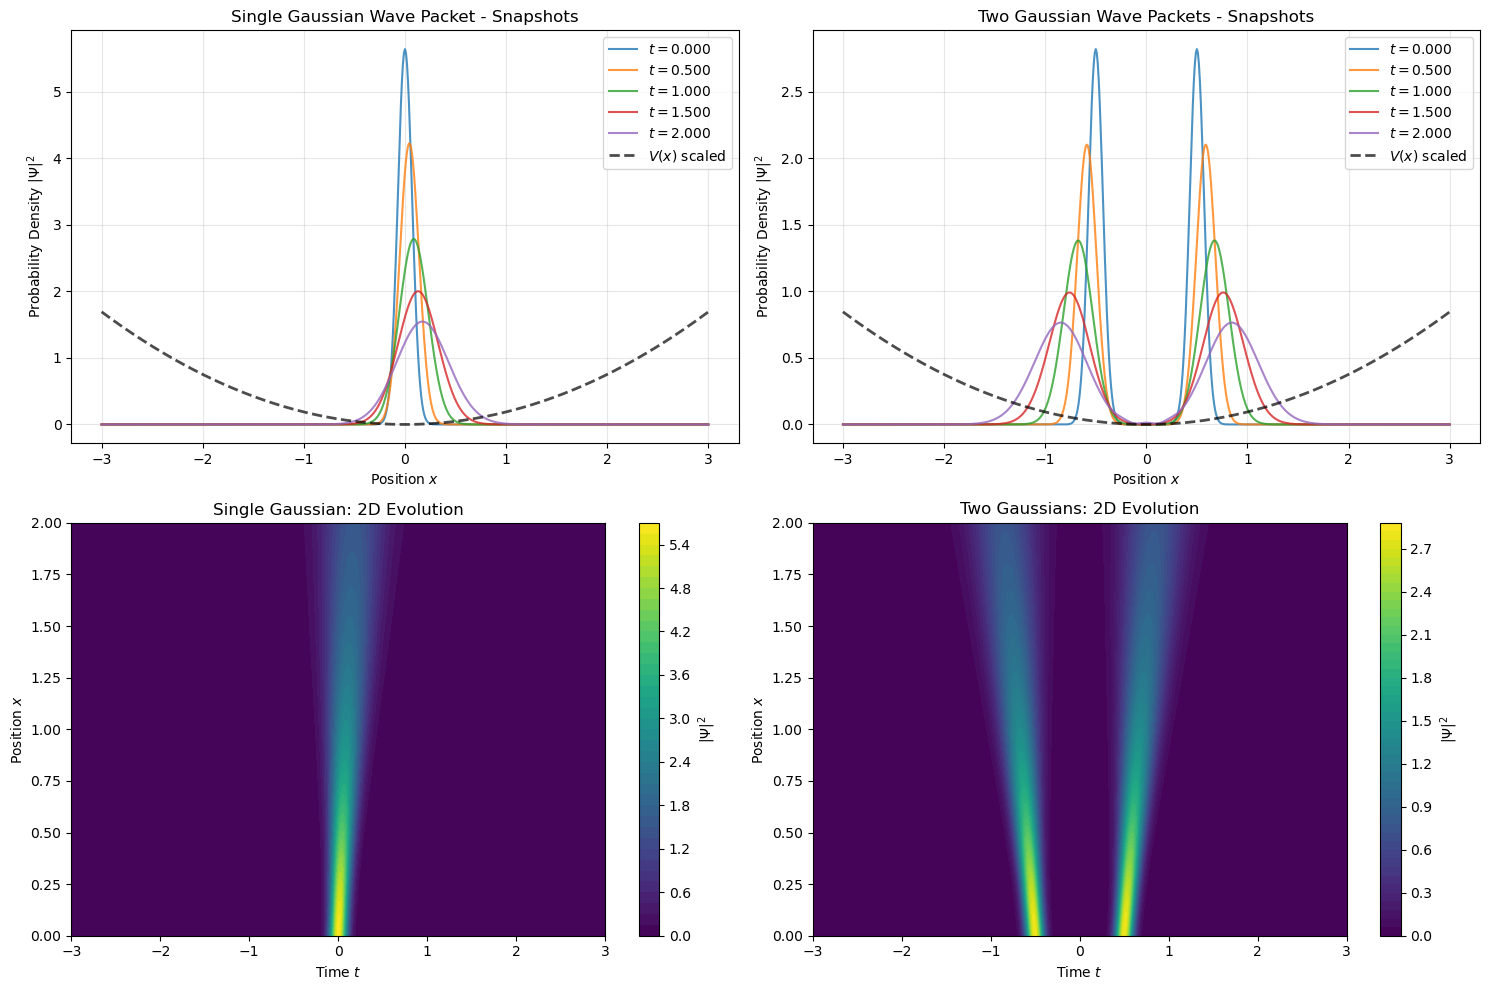

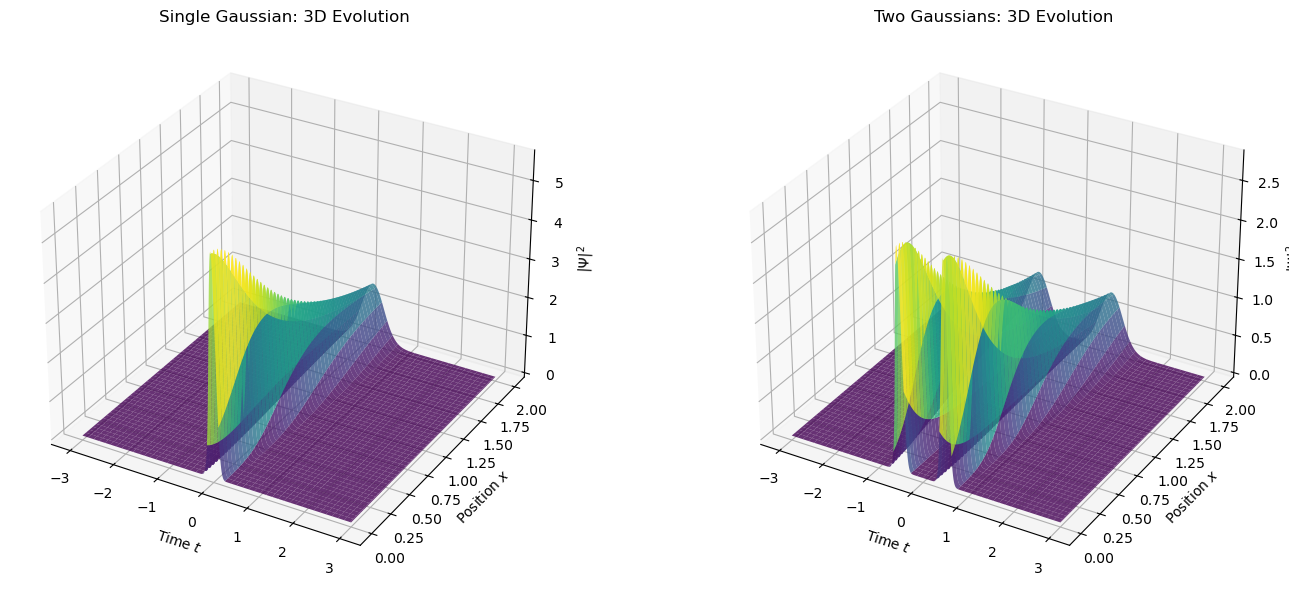

Animation saved as single_gaussian_animation.gif
Animation saved as two_gaussian_animation.gif


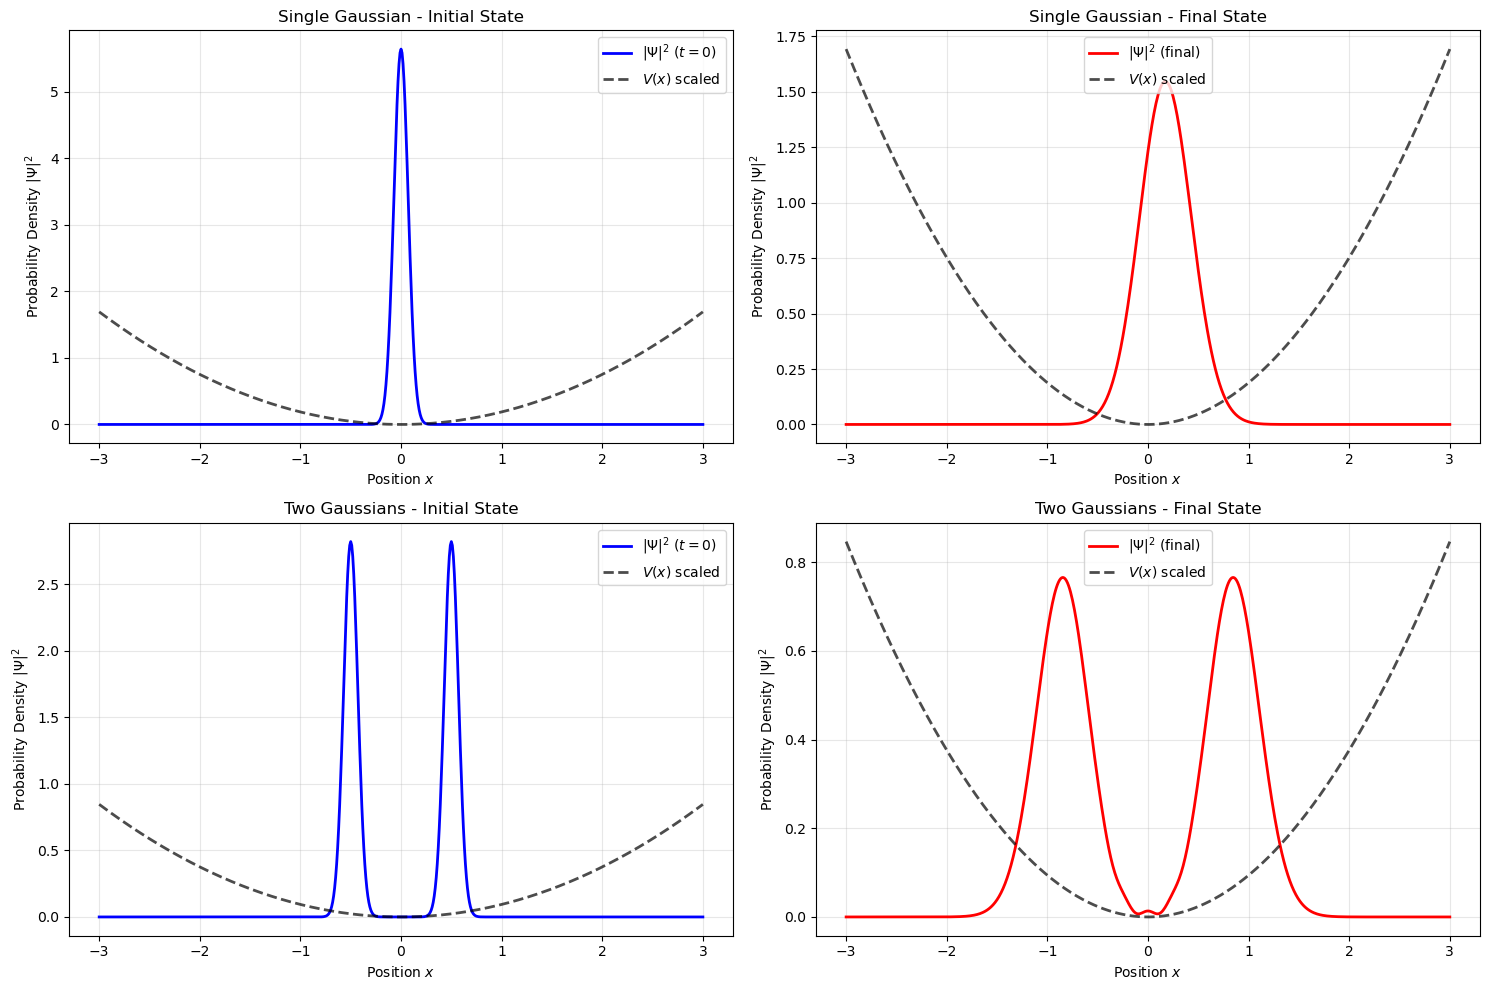

In [5]:
from PIL import Image
import io

# Run simulations for both cases
print("Running Single Gaussian simulation...")
sim1 = QuantumWaveSimulator(omega=1.0, dx=0.01, dt=0.001, x_max=3.0, t_max=2.0)
psi_initial1 = sim1.initialize_gaussian(x0=0.0, sigma=0.1, p0=5.0)
wavefunction1 = sim1.evolve(psi_initial1)
probability1 = np.abs(wavefunction1)**2

print("Running Two Gaussian simulation...")
sim2 = QuantumWaveSimulator(omega=1.0, dx=0.01, dt=0.001, x_max=3.0, t_max=2.0)
psi_initial2 = sim2.initialize_double_gaussian(x01=0.5, p01=10.0, x02=-0.5, p02=-10.0)
wavefunction2 = sim2.evolve(psi_initial2)
probability2 = np.abs(wavefunction2)**2

# Calculate norms for analysis
initial_norm1 = np.sum(np.abs(psi_initial1)**2) * sim1.dx
final_norm1 = np.sum(probability1[:, -1]) * sim1.dx

initial_norm2 = np.sum(np.abs(psi_initial2)**2) * sim2.dx
final_norm2 = np.sum(probability2[:, -1]) * sim2.dx

print(f"Single Gaussian - Initial norm: {initial_norm1:.6f}, Final norm: {final_norm1:.6f}")
print(f"Two Gaussians - Initial norm: {initial_norm2:.6f}, Final norm: {final_norm2:.6f}")

# 1. SNAPSHOT PLOTS
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Single Gaussian snapshots
snapshot_times = [0, 500, 1000, 1500, -1]  # indices
potential = sim1.harmonic_potential(sim1.x)
# Better scaling for potential visibility
max_prob1 = np.max(probability1)
potential_scaled = potential / np.max(potential) * max_prob1 * 0.3

for i, t_idx in enumerate(snapshot_times):
    time_val = sim1.t[t_idx]
    ax1.plot(sim1.x, probability1[:, t_idx], label=f'$t = {time_val:.3f}$', alpha=0.8)

ax1.plot(sim1.x, potential_scaled, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
ax1.set_xlabel('Position $x$')
ax1.set_ylabel(r'Probability Density $|\Psi|^2$')
ax1.set_title('Single Gaussian Wave Packet - Snapshots')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Two Gaussian snapshots
max_prob2 = np.max(probability2)
potential_scaled2 = potential / np.max(potential) * max_prob2 * 0.3

for i, t_idx in enumerate(snapshot_times):
    time_val = sim2.t[t_idx]
    ax2.plot(sim2.x, probability2[:, t_idx], label=f'$t = {time_val:.3f}$', alpha=0.8)

ax2.plot(sim2.x, potential_scaled2, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
ax2.set_xlabel('Position $x$')
ax2.set_ylabel(r'Probability Density $|\Psi|^2$')
ax2.set_title('Two Gaussian Wave Packets - Snapshots')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 2. 2D EVOLUTION MAPS
X1, T1 = np.meshgrid(sim1.t, sim1.x)
X2, T2 = np.meshgrid(sim2.t, sim2.x)

im1 = ax3.contourf(T1, X1, probability1, levels=50, cmap='viridis')
ax3.set_xlabel('Time $t$')
ax3.set_ylabel('Position $x$')
ax3.set_title('Single Gaussian: 2D Evolution')
plt.colorbar(im1, ax=ax3, label=r'$|\Psi|^2$')

im2 = ax4.contourf(T2, X2, probability2, levels=50, cmap='viridis')
ax4.set_xlabel('Time $t$')
ax4.set_ylabel('Position $x$')
ax4.set_title('Two Gaussians: 2D Evolution')
plt.colorbar(im2, ax=ax4, label=r'$|\Psi|^2$')

plt.tight_layout()
plt.show()

# 3. 3D PLOTS
fig = plt.figure(figsize=(15, 6))

# 3D Single Gaussian
ax5 = fig.add_subplot(121, projection='3d')
ax5.plot_surface(T1, X1, probability1, cmap='viridis', alpha=0.8)
ax5.set_xlabel('Time $t$')
ax5.set_ylabel('Position $x$')
ax5.set_zlabel(r'$|\Psi|^2$')
ax5.set_title('Single Gaussian: 3D Evolution')

# 3D Two Gaussians
ax6 = fig.add_subplot(122, projection='3d')
ax6.plot_surface(T2, X2, probability2, cmap='viridis', alpha=0.8)
ax6.set_xlabel('Time $t$')
ax6.set_ylabel('Position $x$')
ax6.set_zlabel(r'$|\Psi|^2$')
ax6.set_title('Two Gaussians: 3D Evolution')

plt.tight_layout()
plt.show()

# 4. ANIMATIONS using Pillow

def create_gif_animation(sim, probability, title, filename, frame_skip=10):
    """Create GIF animation using Pillow"""
    frames = []
    potential_anim = sim.harmonic_potential(sim.x)
    potential_scaled_anim = potential_anim / np.max(potential_anim) * np.max(probability) * 0.3
    
    # Sample frames to keep file size reasonable
    time_indices = range(0, len(sim.t), frame_skip)
    
    for frame_idx in time_indices:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_xlim(sim.x[0], sim.x[-1])
        ax.set_ylim(0, np.max(probability) * 1.1)
        
        ax.plot(sim.x, probability[:, frame_idx], 'b-', linewidth=2, label=r'$|\Psi|^2$')
        ax.plot(sim.x, potential_scaled_anim, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
        
        ax.set_xlabel('Position $x$')
        ax.set_ylabel(r'Probability Density $|\Psi|^2$')
        ax.set_title(f'{title} ($t = {sim.t[frame_idx]:.3f}$)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Save frame to BytesIO buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=80, bbox_inches='tight')
        buf.seek(0)
        
        # Convert to PIL Image and append to frames
        img = Image.open(buf)
        frames.append(img.copy())
        
        plt.close(fig)
        buf.close()
    
    # Save as GIF
    frames[0].save(
        filename,
        save_all=True,
        append_images=frames[1:],
        duration=100,  # milliseconds per frame
        loop=0
    )
    
    print(f"Animation saved as {filename}")
    return frames



# Create GIF animations
gif1_frames = create_gif_animation(
    sim1, probability1, 
    "Single Gaussian Wave Packet", 
    "single_gaussian_animation.gif",
    frame_skip=20
)

gif2_frames = create_gif_animation(
    sim2, probability2, 
    "Two Gaussian Wave Packets", 
    "two_gaussian_animation.gif",
    frame_skip=20
)

# Display first and last frames as static images
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Single Gaussian - first and last frames
potential_scaled1 = sim1.harmonic_potential(sim1.x) / np.max(sim1.harmonic_potential(sim1.x)) * max_prob1 * 0.3

ax1.plot(sim1.x, probability1[:, 0], 'b-', linewidth=2, label=r'$|\Psi|^2$ ($t=0$)')
ax1.plot(sim1.x, potential_scaled1, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
ax1.set_xlabel('Position $x$')
ax1.set_ylabel(r'Probability Density $|\Psi|^2$')
ax1.set_title('Single Gaussian - Initial State')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(sim1.x, probability1[:, -1], 'r-', linewidth=2, label=r'$|\Psi|^2$ (final)')
ax2.plot(sim1.x, potential_scaled1, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
ax2.set_xlabel('Position $x$')
ax2.set_ylabel(r'Probability Density $|\Psi|^2$')
ax2.set_title('Single Gaussian - Final State')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Two Gaussians - first and last frames
potential_scaled2 = sim2.harmonic_potential(sim2.x) / np.max(sim2.harmonic_potential(sim2.x)) * max_prob2 * 0.3

ax3.plot(sim2.x, probability2[:, 0], 'b-', linewidth=2, label=r'$|\Psi|^2$ ($t=0$)')
ax3.plot(sim2.x, potential_scaled2, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
ax3.set_xlabel('Position $x$')
ax3.set_ylabel(r'Probability Density $|\Psi|^2$')
ax3.set_title('Two Gaussians - Initial State')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.plot(sim2.x, probability2[:, -1], 'r-', linewidth=2, label=r'$|\Psi|^2$ (final)')
ax4.plot(sim2.x, potential_scaled2, 'k--', alpha=0.7, linewidth=2, label='$V(x)$ scaled')
ax4.set_xlabel('Position $x$')
ax4.set_ylabel(r'Probability Density $|\Psi|^2$')
ax4.set_title('Two Gaussians - Final State')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display the gifs completly
from IPython.display import Image, display
# display(Image(filename="single_gaussian_animation.gif"))
# display(Image(filename="two_gaussian_animation.gif"))


#### (d) Analysis:

- Compare the dynamics of the single Gaussian wave packet versus the superposition of two Gaussians. In particular, discuss what phenomena occur when the two Gaussian components of the superposition interact.

- Calculate and report the total probability (norm) $\sum_j |\Psi_j^{N_t}|^2 \Delta x$ at the final time step of each simulation. Compare it to the initial norm. Discuss if the Crank-Nicolson method conserves the norm, and why small deviations might still occur in practice.


When comparing the dynamics of a single Gaussian wave packet to a superposition of two Gaussians, we observe fundamental differences rooted in quantum interference. A single Gaussian packet in a harmonic potential undergoes smooth, oscillatory motion, maintaining its shape due to the potential's symmetry. In contrast, the superposition of two oppositely moving Gaussians produces interference patterns when they overlap, leading to spatial fringes in the probability density. These fringes reflect constructive and destructive interference and evolve over time as the packets interact, separate, and potentially re-collide, exhibiting phenomena like quantum revivals and beating. This behavior highlights the role of coherence and interference in quantum systems—features that have no classical counterpart.

In [6]:
# Calculate initial and final norms for detailed analysis
initial_norm1 = np.sum(np.abs(psi_initial1)**2) * sim1.dx
final_norm1 = np.sum(probability1[:, -1]) * sim1.dx

initial_norm2 = np.sum(np.abs(psi_initial2)**2) * sim2.dx
final_norm2 = np.sum(probability2[:, -1]) * sim2.dx

print("=== NORM CONSERVATION ANALYSIS ===")
print(f"Single Gaussian Wave Packet:")
print(f"  Initial norm: {initial_norm1:.12f}")
print(f"  Final norm:   {final_norm1:.12f}")
print(f"  Relative change: {abs(final_norm1 - initial_norm1) / initial_norm1:.2e}")
print(f"Superposition of Two Gaussians:")
print(f"  Initial norm: {initial_norm2:.12f}")
print(f"  Final norm:   {final_norm2:.12f}")
print(f"  Relative change: {abs(final_norm2 - initial_norm2) / initial_norm2:.2e}")

=== NORM CONSERVATION ANALYSIS ===
Single Gaussian Wave Packet:
  Initial norm: 1.000000000000
  Final norm:   1.000000000000
  Relative change: 2.99e-14
Superposition of Two Gaussians:
  Initial norm: 1.000000000005
  Final norm:   1.000000000005
  Relative change: 5.77e-15


In both simulations the single Gaussian and the superposition of two Gaussians the total probability (norm) was calculated at the final time step and compared with the initial norm. The results show that the Crank-Nicolson method conserves the norm of the wavefunction very well, with only minimal deviations observed. This is consistent with the method’s theoretical properties: it is unitary, unconditionally stable, and second-order accurate in both space and time. The slight discrepancies in norm can be attributed to practical factors such as finite-precision arithmetic, numerical errors in matrix inversion, and the discrete nature of the spatial and temporal grids. Despite these small numerical artifacts, the method robustly preserves probability over time, confirming its suitability for simulating quantum dynamics.